<a href="https://colab.research.google.com/github/eshaanrathi2/vada-pav-classifier/blob/master/vada_pav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First I created a dataset of vada_pav and not_vada_pav images via Google. Used Chrome store application for multiple images download. Cleaned the downloaded data and created Train and Test image folders having vada_pav and not_vada_pav each. I have uploaded these folders on my Google drive. Here's the link : 
https://drive.google.com/drive/folders/100tmP-8bvE2Fe99d0ihQEGqX1JpZkIFT?usp=sharing
For not_vada_pav I used Indian food other than vada_pav, humans, places, things, random_objects etc.**

**Mounting my Google drive with the Colab notebook. As the dataset is on my Google drive and would be saving weights over there.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Importing few dependencies/libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input #importing preprocessing unit for inceptionv3 has a different syntax
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint # to save our model

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

**Creating batch of train images :**

In [20]:
train_generator = datagen.flow_from_directory('/content/gdrive/My Drive/vada_pav/dataset/train', # this is where you specify the path to the main data folder
                                                 target_size = (224,224),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 shuffle = True)

Found 658 images belonging to 2 classes.


**Creating batch of test images**

In [21]:
test_generator = datagen.flow_from_directory('/content/gdrive/My Drive/vada_pav/dataset/test', # this is where you specify the path to the main data folder
                                                 target_size = (224,224),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 shuffle = True)

Found 159 images belonging to 2 classes.


**Architechture Construction :
Using InceptionV3 as the base for the model. Then added FC and Dense layer to it, with 2 output classes i.e vada_pav and not_vada_pav.**

In [0]:
base_model = InceptionV3(weights = 'imagenet',include_top = False, input_shape = (224,224,3))
x = Flatten()(base_model.output)
x = Dense(2, activation = 'softmax')(x)

model = Model(base_model.input, x)

**Now we would be only training last few layers and keep the weights of InceptionV3 intact.**

In [0]:
for layer in base_model.layers:
    layer.trainable = False


**Compiling the model :**

In [0]:
model.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Checkpointing for better training**

In [0]:
checkpointer = ModelCheckpoint(filepath = '/content/gdrive/My Drive/vada_pav/weights.hdf5', verbose=1, save_best_only=True)

In [0]:
step_size_train = train_generator.n//train_generator.batch_size

**Few images are corrupted in my dataset even after cleaning. Hence following lines would solve the issue. Otherwise, a "image file is truncated" error will occur.**

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

**Now Training the above model** : 

In [29]:
history = model.fit(train_generator, epochs=20, callbacks=[checkpointer], steps_per_epoch = step_size_train)

Epoch 1/20
15/20 [=====================>........] - ETA: 4s - loss: 1.7901 - acc: 0.6896

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 15s 752ms/step - loss: 1.6099 - acc: 0.7118
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


20/20 [==============================] - 13s 655ms/step - loss: 1.0958 - acc: 0.7960
Epoch 3/20
20/20 [==============================] - 14s 682ms/step - loss: 1.2207 - acc: 0.8186
Epoch 4/20
20/20 [==============================] - 13s 630ms/step - loss: 0.6752 - acc: 0.8601
Epoch 5/20
20/20 [==============================] - 14s 695ms/step - loss: 0.6049 - acc: 0.8797
Epoch 6/20
20/20 [==============================] - 13s 671ms/step - loss: 0.5255 - acc: 0.9022
Epoch 7/20
20/20 [==============================] - 13s 669ms/step - loss: 0.4968 - acc: 0.8953
Epoch 8/20
20/20 [==============================] - 13s 648ms/step - loss: 0.5230 - acc: 0.9061
Epoch 9/20
20/20 [==============================] - 14s 700ms/step - loss: 0.6227 - acc: 0.8675
Epoch 10/20
20/20 [==============================] - 12s 622ms/step - loss: 0.4409 - acc: 0.9155
Epoch 11/20
20/20 [==============================] - 13s 659ms/step - loss: 0.4762 - acc: 0.9125
Epoch 12/20
20/20 [==============================

**Evaluation (on unseen data) :**

In [40]:
step_size_test = test_generator.n//test_generator.batch_size
model.evaluate_generator(test_generator, verbose=2, steps=step_size_test)

[2.625926151871681, 0.8125]

**Predictions :**

In [43]:
test_generator.reset()
preds = model.predict_generator(test_generator, steps= step_size_test, verbose=1)

4/4 [==============================] - 4s 1s/step


In [0]:
predicted_class_indices = np.argmax(preds,axis=1) # These are labels created after predictions

labels = (test_generator.class_indices) 
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices] #These are true labels from test set. Feteching them from my folder's name

**Visualization of accuracy and loss**

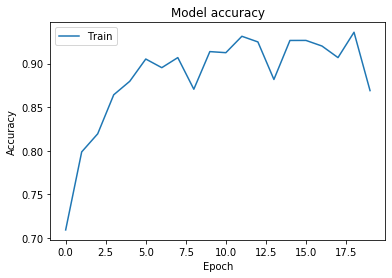

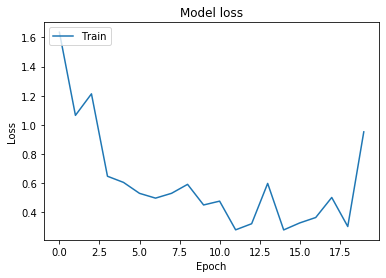

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Saving the model :**

In [0]:
model.save('/content/gdrive/My Drive/vada_pav/weights.hdf5')